# Segmenting the video

In [ ]:
import json

# Load the JSON file
with open("transcription_with_timestamps_TV-20241029-2025-3400.webxxl.h264.mp3.json", "r") as f:
    segments = json.load(f)

# Example: Print all segments
for segment in segments:
    print(f"[{segment['start']:.2f} - {segment['end']:.2f}] {segment['text']}")

# Example: Analyze total duration
total_duration = sum(segment["end"] - segment["start"] for segment in segments)
print(f"Total Duration of Transcription: {total_duration:.2f} seconds")


[0.00 - 7.30]  Hier ist das Erste Deutsche Fernsehen mit der Tagesschau.
[14.42 - 17.50]  Heute im Studio Susanne Daubner.
[18.08 - 19.80]  Guten Abend, meine Damen und Herren.
[19.96 - 21.94]  Ich begrüße Sie zur Tagesschau.
[22.44 - 25.98]  Die Ampelregierung hat heute auf zwei getrennten Terminen
[25.98 - 29.04]  in Berlin darüber beraten, wie die Wirtschaft unterstützt
[29.04 - 31.58]  und das Wachstum angekurbelt werden kann.
[32.16 - 36.04]  Finanzminister Lindner kam am Vormittag mit Mittelständlern zusammen.
[36.42 - 38.40]  Konkrete Ergebnisse gab es nicht.
[38.94 - 43.34]  Bundeskanzler Scholz lud Vertreter von Industrie, Verbänden und Gewerkschaften
[43.34 - 45.16]  zu vertraulichen Gesprächen ein.
[46.52 - 51.04]  Durchgang heute Nachmittag nur für Industrievertreter und Gewerkschafter
[51.04 - 52.22]  im Kanzleramt.
[52.64 - 55.24]  Geladen hat Olaf Scholz, und zwar er allein.
[55.24 - 57.74]  Es soll der Beginn eines Austauschs sein.
[57.74 - 59.06]  Ein Industriegipfel.


In [ ]:
segments[1]['start']

12.76

In [ ]:
def find_nearest_segment(segments, time_point):
    """
    Find the segment whose 'end' time is the closest and less than or equal to the given time point.

    Args:
        segments (list): List of transcription segments (each is a dictionary with 'start', 'end', and 'text').
        time_point (float): The time point to search for.

    Returns:
        dict: A dictionary with the index and text of the nearest segment.
    """
    # Filter segments to find those where the 'end' is less than or equal to the time_point
    valid_segments = [seg for seg in segments if seg["end"] <= time_point]

    if not valid_segments:
        return {"index": None, "text": None}  # No valid segment found

    # Find the segment with the maximum 'end' (closest to time_point)
    nearest_segment = max(valid_segments, key=lambda seg: seg["end"])
    index = segments.index(nearest_segment)

    return {"index": index, "text": nearest_segment["text"]}


In [ ]:
# Example Usage
time_point = 2*60+ 11.0  # Specify the time point in seconds
nearest_segment_info = find_nearest_segment(segments, time_point)

print(f"Index: {nearest_segment_info['index']}")
print(f"Text: {nearest_segment_info['text']}")


Index: 33
Text:  Beschlüsse gibt es heute nicht, bei keinem der separaten Gipfel.


In [ ]:
def find_and_concatenate_segments(segments, timestamps):
    """
    For each timestamp in the list, find the nearest segment where 'end' is closest before the timestamp.
    Concatenate text from the nearest segment to the last processed segment.

    Args:
        segments (list): List of transcription segments (each with 'start', 'end', 'text').
        timestamps (list): List of timestamps in seconds.

    Returns:
        list: A list of concatenated texts corresponding to each timestamp.
    """
    results = []
    last_index = -1  # Start with no previous segment

    for time_point in timestamps:
        # Filter segments to find those where 'end' is less than or equal to the time_point
        valid_segments = [seg for seg in segments if seg["end"] <= time_point]

        if not valid_segments:
            results.append("")  # No valid segment found
            continue

        # Find the segment with the maximum 'end' (closest to time_point)
        nearest_segment = max(valid_segments, key=lambda seg: seg["end"])
        current_index = segments.index(nearest_segment)

        # Concatenate text from the last segment to the current segment
        if last_index != -1 and current_index > last_index:
            concatenated_text = " ".join(
                seg["text"] for seg in segments[last_index + 1 : current_index + 1]
            )
        else:
            concatenated_text = nearest_segment["text"]

        # Store the concatenated text
        results.append(concatenated_text)

        # Update last_index
        last_index = current_index

    return results


# Example usage
timestamps = [20.0, 34.0, 46.0, 62.0, 66.0, 86.0, 96.0, 107.0, 117.0, 124.0]  # List of timestamps in seconds

# Get concatenated texts for the timestamps
results = find_and_concatenate_segments(segments, timestamps)

# Print results
for i, (timestamp, text) in enumerate(zip(timestamps, results)):
    print(f"Timestamp {timestamp:.2f}: {text}")


Timestamp 20.00:  Guten Abend, meine Damen und Herren.
Timestamp 34.00:  Ich begrüße Sie zur Tagesschau.  Die Ampelregierung hat heute auf zwei getrennten Terminen  in Berlin darüber beraten, wie die Wirtschaft unterstützt  und das Wachstum angekurbelt werden kann.
Timestamp 46.00:  Finanzminister Lindner kam am Vormittag mit Mittelständlern zusammen.  Konkrete Ergebnisse gab es nicht.  Bundeskanzler Scholz lud Vertreter von Industrie, Verbänden und Gewerkschaften  zu vertraulichen Gesprächen ein.
Timestamp 62.00:  Durchgang heute Nachmittag nur für Industrievertreter und Gewerkschafter  im Kanzleramt.  Geladen hat Olaf Scholz, und zwar er allein.  Es soll der Beginn eines Austauschs sein.  Ein Industriegipfel.  Wie kommt die Branche aus der Wirtschaftskrise?
Timestamp 66.00:  Ein neuer Spirit wird gesucht.  Vertraulich.
Timestamp 86.00:  Ohne Statements vor den Kameras.  Ganz anders der Finanzminister.  Im Kanzleramt war er nicht eingeladen.  Und so organisiert Lindner heute sein eige

In [ ]:
landmarks_output_path = '/content/TV-20241029-2025-3400.webxxl.h264_landmarks.json'


In [ ]:
with open(landmarks_output_path, 'r') as f:
    data = json.load(f)


In [ ]:
len(data)

24616

In [ ]:
if data:
    first_object = data[653*25+19]["hands"]
    print(json.dumps(first_object, indent=4))
else:
    print("The JSON file is empty.")


[
    {
        "label": "Left",
        "landmarks": [
            {
                "x": 0.38505232334136963,
                "y": 0.6349576711654663,
                "z": 3.0656892135993985e-08
            },
            {
                "x": 0.42702433466911316,
                "y": 0.612737774848938,
                "z": -0.001861120224930346
            },
            {
                "x": 0.4739275276660919,
                "y": 0.6200323104858398,
                "z": -0.0049125817604362965
            },
            {
                "x": 0.5091911554336548,
                "y": 0.6373518705368042,
                "z": -0.0071869813837111
            },
            {
                "x": 0.5387426018714905,
                "y": 0.6418150067329407,
                "z": -0.00835978239774704
            },
            {
                "x": 0.4794338345527649,
                "y": 0.639231264591217,
                "z": -0.018082404509186745
            },
            {
       

In [ ]:
len(first_object[0]["landmarks"])

21

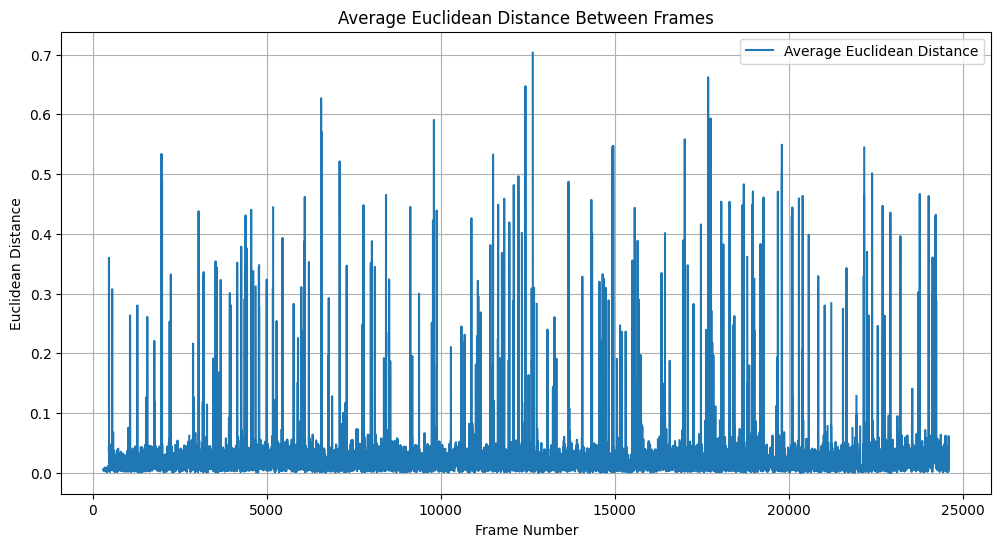

In [ ]:
import json
import math
import matplotlib.pyplot as plt

# Read the JSON file
with open(landmarks_output_path, 'r') as f:
    data = json.load(f)

# List to store the average Euclidean distances per frame transition
avg_euclidean_distances = []

# Iterate over frame pairs
for i in range(len(data) - 1):
    frame_data_current = data[i]
    frame_data_next = data[i + 1]

    # Dictionaries to store per-hand distances
    per_hand_distances = {}

    # Get hands in current and next frames
    hands_current = {hand['label']: hand for hand in frame_data_current['hands']}
    hands_next = {hand['label']: hand for hand in frame_data_next['hands']}

    # Find common hands between frames
    hands_common = set(hands_current.keys()) & set(hands_next.keys())

    if hands_common:
        for hand_label in hands_common:
            landmarks_current = hands_current[hand_label]['landmarks']
            landmarks_next = hands_next[hand_label]['landmarks']

            # Ensure both hands have 21 landmarks
            if len(landmarks_current) == 21 and len(landmarks_next) == 21:
                distances = []
                for lm_c, lm_n in zip(landmarks_current, landmarks_next):
                    x_c, y_c = lm_c['x'], lm_c['y']
                    x_n, y_n = lm_n['x'], lm_n['y']

                    # Compute Euclidean distance
                    dist = math.sqrt((x_n - x_c)**2 + (y_n - y_c)**2)
                    distances.append(dist)

                # Average distance for this hand
                avg_dist = sum(distances) / len(distances)
                per_hand_distances[hand_label] = avg_dist

    # Average across hands
    if per_hand_distances:
        avg_dist_across_hands = sum(per_hand_distances.values()) / len(per_hand_distances)
        avg_euclidean_distances.append(avg_dist_across_hands)
    else:
        # If no hands are detected in both frames, append NaN
        avg_euclidean_distances.append(float('nan'))

# Create a list of frame indices corresponding to the frame transitions
frame_indices = list(range(1, len(data)))

# Plot the average Euclidean distances over time
plt.figure(figsize=(12, 6))
plt.plot(frame_indices, avg_euclidean_distances, label='Average Euclidean Distance')
plt.xlabel('Frame Number')
plt.ylabel('Euclidean Distance')
plt.title('Average Euclidean Distance Between Frames')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
type(avg_euclidean_distances[0])

float

In [ ]:
avg_euclidean_distances = [0 if math.isnan(x) else x for x in avg_euclidean_distances]

In [ ]:
avg_euclidean_distances[653*25+19:]

[0.30450673785824517,
 0.33450940485250724,
 0.014473481419276969,
 0.01632985071164548,
 0.019517300845578324,
 0.020510686071988207,
 0.010863253657958805,
 0.01050451243335467,
 0.013017394261104643,
 0.00877290024447893,
 0.0074065617483500155,
 0.011432657704535491,
 0.016906293944216916,
 0.02602069681215812,
 0.029269561724346582,
 0.01906310243090267,
 0.02030677451684407,
 0.015622158237952176,
 0.0212555270757955,
 0.027041006436761165,
 0.0206472695216893,
 0.027397128981643724,
 0.02234137081501831,
 0,
 0.054780124359032414,
 0.029355829847347886,
 0.013422487396116633,
 0.03871612589581042,
 0.03263168304311117,
 0.02821791599086499,
 0.032198308258958495,
 0.10133727557733369,
 0.0309885237757685,
 0.10532192933610617,
 0.014935179018067957,
 0.013547866808927625,
 0.013099173281736522,
 0.009965174930801596,
 0.005937142437441135,
 0.005598561853001935,
 0.004923405091776582,
 0.09716635175280668,
 0.013221037346290281,
 0.1495657857535197,
 0.03670977675557433,
 0.0344

In [ ]:
import math

# Example list
data = avg_euclidean_distances

# Frame rate (frames per second)
frame_rate = 25

# Find indices of NaN values
nan_indices = [i for i, value in enumerate(data) if value < 0.005]

# Group the indices into continuous segments
groups = []
current_group = []

for index in nan_indices:
    if not current_group or index == current_group[-1] + 1:
        current_group.append(index)
    else:
        groups.append(current_group)
        current_group = [index]

# Add the last group if it exists
if current_group:
    groups.append(current_group)

# Merge groups with a gap of at most 10 indices
merged_groups = []
current_group = groups[0]  # Start with the first group

for group in groups[1:]:
    if group[0] - current_group[-1] <= 10:
        current_group.extend(group)
    else:
        merged_groups.append(current_group)
        current_group = group

merged_groups.append(current_group)  # Add the last group

# Filter out groups with fewer than 15 indices
final_groups = [group for group in merged_groups if len(group) >= 15]

# Calculate medium indices and output results
medium_indices = []
print("Final grouped indices (time in minutes:seconds):")
for group in final_groups:
    start_time = group[0] / frame_rate
    end_time = group[-1] / frame_rate
    start_minutes, start_seconds = divmod(start_time, 60)
    end_minutes, end_seconds = divmod(end_time, 60)
    medium_index = (group[0] + group[-1]) // 2
    medium_indices.append(medium_index)
    print(f"Frames {group[0]} to {group[-1]}: {int(start_minutes)}:{start_seconds:04.1f} to {int(end_minutes)}:{end_seconds:04.1f} ({len(group)} frames) - Medium Index: {medium_index}")

# Output medium indices for further processing
print("\nList of medium indices for further processing:", medium_indices)


Final grouped indices (time in minutes:seconds):
Frames 0 to 470: 0:00.0 to 0:18.8 (468 frames) - Medium Index: 235
Frames 630 to 674: 0:25.2 to 0:27.0 (21 frames) - Medium Index: 652
Frames 692 to 721: 0:27.7 to 0:28.8 (18 frames) - Medium Index: 706
Frames 808 to 873: 0:32.3 to 0:34.9 (30 frames) - Medium Index: 840
Frames 925 to 997: 0:37.0 to 0:39.9 (33 frames) - Medium Index: 961
Frames 1114 to 1144: 0:44.6 to 0:45.8 (23 frames) - Medium Index: 1129
Frames 1164 to 1222: 0:46.6 to 0:48.9 (21 frames) - Medium Index: 1193
Frames 1306 to 1370: 0:52.2 to 0:54.8 (41 frames) - Medium Index: 1338
Frames 1389 to 1422: 0:55.6 to 0:56.9 (27 frames) - Medium Index: 1405
Frames 1437 to 1463: 0:57.5 to 0:58.5 (16 frames) - Medium Index: 1450
Frames 1476 to 1539: 0:59.0 to 1:01.6 (22 frames) - Medium Index: 1507
Frames 1621 to 1646: 1:04.8 to 1:05.8 (18 frames) - Medium Index: 1633
Frames 1680 to 1720: 1:07.2 to 1:08.8 (16 frames) - Medium Index: 1700
Frames 2022 to 2137: 1:20.9 to 1:25.5 (57 fr

In [ ]:
len(medium_indices)

65

In [ ]:
time_in_s = [(frame / 25) for frame in medium_indices]

In [ ]:
time_in_s

[4.68,
 14.12,
 20.6,
 34.48,
 46.4,
 62.44,
 66.68,
 79.52,
 86.96,
 96.6,
 107.84,
 115.2,
 124.72,
 131.32,
 147.48,
 154.44,
 159.64,
 169.44,
 180.92,
 192.72,
 201.28,
 217.56,
 249.2,
 254.16,
 303.64,
 316.88,
 365.56,
 373.48,
 406.72,
 409.88,
 444.92,
 458.84,
 479.0,
 492.6,
 506.32,
 517.2,
 535.12,
 550.84,
 560.44,
 571.92,
 632.64,
 634.56,
 659.08,
 683.24,
 700.36,
 709.92,
 728.0,
 732.96,
 766.08,
 774.88,
 787.52,
 831.52,
 875.72,
 878.44,
 886.12,
 891.2,
 912.48,
 917.72,
 948.24,
 959.72,
 964.76,
 972.68,
 992.28,
 997.68,
 1012.0]

In [ ]:
timestamps = time_in_s # List of timestamps in seconds

# Get concatenated texts for the timestamps
results = find_and_concatenate_segments(segments, timestamps)

# Print results
for i, (timestamp, text) in enumerate(zip(timestamps, results)):
    print(f"Timestamp {timestamp:.2f}: {text}")

In [ ]:
earlist_in_s = segments[1]['start']
for index, t in enumerate(time_in_s):
  if t > earlist_in_s:
    break
  start_t = t


In [ ]:
index,start_t

(2, 14.12)

In [ ]:
final_groups[index-1][-1]

411

In [ ]:
cut_frames = [411]

In [ ]:
for i in medium_indices[index:]:
  cut_frames.append(i)


In [ ]:
cut_instructions = []
for i in range(len(cut_frames)-1):
  cut_instructions.append({"cut_start": cut_frames[i], "cut_end" : cut_frames[i+1]})



In [ ]:
len(results[2:]), len(cut_instructions)

(63, 63)

In [ ]:
results[2]

' Ich begrüße Sie zur Tagesschau.'

In [ ]:
cut_instructions

[{'cut_start': 411, 'cut_end': 515},
 {'cut_start': 515, 'cut_end': 862},
 {'cut_start': 862, 'cut_end': 1160},
 {'cut_start': 1160, 'cut_end': 1561},
 {'cut_start': 1561, 'cut_end': 1667},
 {'cut_start': 1667, 'cut_end': 1988},
 {'cut_start': 1988, 'cut_end': 2174},
 {'cut_start': 2174, 'cut_end': 2415},
 {'cut_start': 2415, 'cut_end': 2696},
 {'cut_start': 2696, 'cut_end': 2880},
 {'cut_start': 2880, 'cut_end': 3118},
 {'cut_start': 3118, 'cut_end': 3283},
 {'cut_start': 3283, 'cut_end': 3687},
 {'cut_start': 3687, 'cut_end': 3861},
 {'cut_start': 3861, 'cut_end': 3991},
 {'cut_start': 3991, 'cut_end': 4236},
 {'cut_start': 4236, 'cut_end': 4523},
 {'cut_start': 4523, 'cut_end': 4818},
 {'cut_start': 4818, 'cut_end': 5032},
 {'cut_start': 5032, 'cut_end': 5439},
 {'cut_start': 5439, 'cut_end': 6230},
 {'cut_start': 6230, 'cut_end': 6354},
 {'cut_start': 6354, 'cut_end': 7591},
 {'cut_start': 7591, 'cut_end': 7922},
 {'cut_start': 7922, 'cut_end': 9139},
 {'cut_start': 9139, 'cut_end'

In [ ]:
!pip install -q moviepy

In [ ]:
from moviepy.video.io.VideoFileClip import VideoFileClip

def split_video(input_video, cutting_sequences, output_prefix, fps=30):
    """
    Splits a video into multiple subsequences based on a list of cutting sequences.

    :param input_video: Path to the input video file (mp4 format)
    :param cutting_sequences: List of dictionaries with 'cut_start' and 'cut_end' keys
    :param output_prefix: Prefix for the output video filenames
    :param fps: Frames per second of the video (default is 30)
    """
    # Load the video file
    clip = VideoFileClip(input_video)

    for i, sequence in enumerate(cutting_sequences):
        start_frame = sequence['cut_start']
        end_frame = sequence['cut_end']

        # Calculate start and end times in seconds
        start_time = start_frame / fps
        end_time = end_frame / fps

        # Extract the subsequence
        subclip = clip.subclip(start_time, end_time)

        # Define the output filename
        output_video = f"{output_prefix}_part_{i+1}.mp4"

        # Write the output video
        subclip.write_videofile(output_video, codec='libx264')

# Example usage
input_video = "TV-20241106-2027-0600.webxxl.h264.mp4"
output_prefix = "TV-20241106-2027-0600.webxxl.h264_processed"
fps = 25  # Frames per second

split_video(input_video, cut_instructions, output_prefix, fps)


Moviepy - Building video TV-20241106-2027-0600.webxxl.h264_processed_part_1.mp4.
MoviePy - Writing audio in TV-20241106-2027-0600.webxxl.h264_processed_part_1TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video TV-20241106-2027-0600.webxxl.h264_processed_part_1.mp4



Moviepy - Done !
Moviepy - video ready TV-20241106-2027-0600.webxxl.h264_processed_part_1.mp4
Moviepy - Building video TV-20241106-2027-0600.webxxl.h264_processed_part_2.mp4.
MoviePy - Writing audio in TV-20241106-2027-0600.webxxl.h264_processed_part_2TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video TV-20241106-2027-0600.webxxl.h264_processed_part_2.mp4



Moviepy - Done !
Moviepy - video ready TV-20241106-2027-0600.webxxl.h264_processed_part_2.mp4
Moviepy - Building video TV-20241106-2027-0600.webxxl.h264_processed_part_3.mp4.
MoviePy - Writing audio in TV-20241106-2027-0600.webxxl.h264_processed_part_3TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video TV-20241106-2027-0600.webxxl.h264_processed_part_3.mp4



Moviepy - Done !
Moviepy - video ready TV-20241106-2027-0600.webxxl.h264_processed_part_3.mp4
Moviepy - Building video TV-20241106-2027-0600.webxxl.h264_processed_part_4.mp4.
MoviePy - Writing audio in TV-20241106-2027-0600.webxxl.h264_processed_part_4TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video TV-20241106-2027-0600.webxxl.h264_processed_part_4.mp4



Moviepy - Done !
Moviepy - video ready TV-20241106-2027-0600.webxxl.h264_processed_part_4.mp4
Moviepy - Building video TV-20241106-2027-0600.webxxl.h264_processed_part_5.mp4.
MoviePy - Writing audio in TV-20241106-2027-0600.webxxl.h264_processed_part_5TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video TV-20241106-2027-0600.webxxl.h264_processed_part_5.mp4



Moviepy - Done !
Moviepy - video ready TV-20241106-2027-0600.webxxl.h264_processed_part_5.mp4
Moviepy - Building video TV-20241106-2027-0600.webxxl.h264_processed_part_6.mp4.
MoviePy - Writing audio in TV-20241106-2027-0600.webxxl.h264_processed_part_6TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video TV-20241106-2027-0600.webxxl.h264_processed_part_6.mp4



Moviepy - Done !
Moviepy - video ready TV-20241106-2027-0600.webxxl.h264_processed_part_6.mp4
Moviepy - Building video TV-20241106-2027-0600.webxxl.h264_processed_part_7.mp4.
MoviePy - Writing audio in TV-20241106-2027-0600.webxxl.h264_processed_part_7TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video TV-20241106-2027-0600.webxxl.h264_processed_part_7.mp4



Moviepy - Done !
Moviepy - video ready TV-20241106-2027-0600.webxxl.h264_processed_part_7.mp4
Moviepy - Building video TV-20241106-2027-0600.webxxl.h264_processed_part_8.mp4.
MoviePy - Writing audio in TV-20241106-2027-0600.webxxl.h264_processed_part_8TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video TV-20241106-2027-0600.webxxl.h264_processed_part_8.mp4



Moviepy - Done !
Moviepy - video ready TV-20241106-2027-0600.webxxl.h264_processed_part_8.mp4
Moviepy - Building video TV-20241106-2027-0600.webxxl.h264_processed_part_9.mp4.
MoviePy - Writing audio in TV-20241106-2027-0600.webxxl.h264_processed_part_9TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video TV-20241106-2027-0600.webxxl.h264_processed_part_9.mp4



Moviepy - Done !
Moviepy - video ready TV-20241106-2027-0600.webxxl.h264_processed_part_9.mp4
Moviepy - Building video TV-20241106-2027-0600.webxxl.h264_processed_part_10.mp4.
MoviePy - Writing audio in TV-20241106-2027-0600.webxxl.h264_processed_part_10TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video TV-20241106-2027-0600.webxxl.h264_processed_part_10.mp4



Moviepy - Done !
Moviepy - video ready TV-20241106-2027-0600.webxxl.h264_processed_part_10.mp4
Moviepy - Building video TV-20241106-2027-0600.webxxl.h264_processed_part_11.mp4.
MoviePy - Writing audio in TV-20241106-2027-0600.webxxl.h264_processed_part_11TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video TV-20241106-2027-0600.webxxl.h264_processed_part_11.mp4



Moviepy - Done !
Moviepy - video ready TV-20241106-2027-0600.webxxl.h264_processed_part_11.mp4
Moviepy - Building video TV-20241106-2027-0600.webxxl.h264_processed_part_12.mp4.
MoviePy - Writing audio in TV-20241106-2027-0600.webxxl.h264_processed_part_12TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video TV-20241106-2027-0600.webxxl.h264_processed_part_12.mp4



Moviepy - Done !
Moviepy - video ready TV-20241106-2027-0600.webxxl.h264_processed_part_12.mp4
Moviepy - Building video TV-20241106-2027-0600.webxxl.h264_processed_part_13.mp4.
MoviePy - Writing audio in TV-20241106-2027-0600.webxxl.h264_processed_part_13TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video TV-20241106-2027-0600.webxxl.h264_processed_part_13.mp4



Moviepy - Done !
Moviepy - video ready TV-20241106-2027-0600.webxxl.h264_processed_part_13.mp4
Moviepy - Building video TV-20241106-2027-0600.webxxl.h264_processed_part_14.mp4.
MoviePy - Writing audio in TV-20241106-2027-0600.webxxl.h264_processed_part_14TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video TV-20241106-2027-0600.webxxl.h264_processed_part_14.mp4



Moviepy - Done !
Moviepy - video ready TV-20241106-2027-0600.webxxl.h264_processed_part_14.mp4
Moviepy - Building video TV-20241106-2027-0600.webxxl.h264_processed_part_15.mp4.
MoviePy - Writing audio in TV-20241106-2027-0600.webxxl.h264_processed_part_15TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video TV-20241106-2027-0600.webxxl.h264_processed_part_15.mp4



Moviepy - Done !
Moviepy - video ready TV-20241106-2027-0600.webxxl.h264_processed_part_15.mp4
Moviepy - Building video TV-20241106-2027-0600.webxxl.h264_processed_part_16.mp4.
MoviePy - Writing audio in TV-20241106-2027-0600.webxxl.h264_processed_part_16TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video TV-20241106-2027-0600.webxxl.h264_processed_part_16.mp4



Moviepy - Done !
Moviepy - video ready TV-20241106-2027-0600.webxxl.h264_processed_part_16.mp4
Moviepy - Building video TV-20241106-2027-0600.webxxl.h264_processed_part_17.mp4.
MoviePy - Writing audio in TV-20241106-2027-0600.webxxl.h264_processed_part_17TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video TV-20241106-2027-0600.webxxl.h264_processed_part_17.mp4



Moviepy - Done !
Moviepy - video ready TV-20241106-2027-0600.webxxl.h264_processed_part_17.mp4
Moviepy - Building video TV-20241106-2027-0600.webxxl.h264_processed_part_18.mp4.
MoviePy - Writing audio in TV-20241106-2027-0600.webxxl.h264_processed_part_18TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video TV-20241106-2027-0600.webxxl.h264_processed_part_18.mp4



Moviepy - Done !
Moviepy - video ready TV-20241106-2027-0600.webxxl.h264_processed_part_18.mp4
Moviepy - Building video TV-20241106-2027-0600.webxxl.h264_processed_part_19.mp4.
MoviePy - Writing audio in TV-20241106-2027-0600.webxxl.h264_processed_part_19TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video TV-20241106-2027-0600.webxxl.h264_processed_part_19.mp4



Moviepy - Done !
Moviepy - video ready TV-20241106-2027-0600.webxxl.h264_processed_part_19.mp4
Moviepy - Building video TV-20241106-2027-0600.webxxl.h264_processed_part_20.mp4.
MoviePy - Writing audio in TV-20241106-2027-0600.webxxl.h264_processed_part_20TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video TV-20241106-2027-0600.webxxl.h264_processed_part_20.mp4



Moviepy - Done !
Moviepy - video ready TV-20241106-2027-0600.webxxl.h264_processed_part_20.mp4
Moviepy - Building video TV-20241106-2027-0600.webxxl.h264_processed_part_21.mp4.
MoviePy - Writing audio in TV-20241106-2027-0600.webxxl.h264_processed_part_21TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video TV-20241106-2027-0600.webxxl.h264_processed_part_21.mp4



Moviepy - Done !
Moviepy - video ready TV-20241106-2027-0600.webxxl.h264_processed_part_21.mp4
Moviepy - Building video TV-20241106-2027-0600.webxxl.h264_processed_part_22.mp4.
MoviePy - Writing audio in TV-20241106-2027-0600.webxxl.h264_processed_part_22TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video TV-20241106-2027-0600.webxxl.h264_processed_part_22.mp4



Moviepy - Done !
Moviepy - video ready TV-20241106-2027-0600.webxxl.h264_processed_part_22.mp4
Moviepy - Building video TV-20241106-2027-0600.webxxl.h264_processed_part_23.mp4.
MoviePy - Writing audio in TV-20241106-2027-0600.webxxl.h264_processed_part_23TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video TV-20241106-2027-0600.webxxl.h264_processed_part_23.mp4



Moviepy - Done !
Moviepy - video ready TV-20241106-2027-0600.webxxl.h264_processed_part_23.mp4
Moviepy - Building video TV-20241106-2027-0600.webxxl.h264_processed_part_24.mp4.
MoviePy - Writing audio in TV-20241106-2027-0600.webxxl.h264_processed_part_24TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video TV-20241106-2027-0600.webxxl.h264_processed_part_24.mp4



Moviepy - Done !
Moviepy - video ready TV-20241106-2027-0600.webxxl.h264_processed_part_24.mp4
Moviepy - Building video TV-20241106-2027-0600.webxxl.h264_processed_part_25.mp4.
MoviePy - Writing audio in TV-20241106-2027-0600.webxxl.h264_processed_part_25TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video TV-20241106-2027-0600.webxxl.h264_processed_part_25.mp4



Moviepy - Done !
Moviepy - video ready TV-20241106-2027-0600.webxxl.h264_processed_part_25.mp4
Moviepy - Building video TV-20241106-2027-0600.webxxl.h264_processed_part_26.mp4.
MoviePy - Writing audio in TV-20241106-2027-0600.webxxl.h264_processed_part_26TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video TV-20241106-2027-0600.webxxl.h264_processed_part_26.mp4



Moviepy - Done !
Moviepy - video ready TV-20241106-2027-0600.webxxl.h264_processed_part_26.mp4
Moviepy - Building video TV-20241106-2027-0600.webxxl.h264_processed_part_27.mp4.
MoviePy - Writing audio in TV-20241106-2027-0600.webxxl.h264_processed_part_27TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video TV-20241106-2027-0600.webxxl.h264_processed_part_27.mp4



Moviepy - Done !
Moviepy - video ready TV-20241106-2027-0600.webxxl.h264_processed_part_27.mp4
Moviepy - Building video TV-20241106-2027-0600.webxxl.h264_processed_part_28.mp4.
MoviePy - Writing audio in TV-20241106-2027-0600.webxxl.h264_processed_part_28TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video TV-20241106-2027-0600.webxxl.h264_processed_part_28.mp4



Moviepy - Done !
Moviepy - video ready TV-20241106-2027-0600.webxxl.h264_processed_part_28.mp4
Moviepy - Building video TV-20241106-2027-0600.webxxl.h264_processed_part_29.mp4.
MoviePy - Writing audio in TV-20241106-2027-0600.webxxl.h264_processed_part_29TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video TV-20241106-2027-0600.webxxl.h264_processed_part_29.mp4



Moviepy - Done !
Moviepy - video ready TV-20241106-2027-0600.webxxl.h264_processed_part_29.mp4
Moviepy - Building video TV-20241106-2027-0600.webxxl.h264_processed_part_30.mp4.
MoviePy - Writing audio in TV-20241106-2027-0600.webxxl.h264_processed_part_30TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video TV-20241106-2027-0600.webxxl.h264_processed_part_30.mp4



Moviepy - Done !
Moviepy - video ready TV-20241106-2027-0600.webxxl.h264_processed_part_30.mp4
Moviepy - Building video TV-20241106-2027-0600.webxxl.h264_processed_part_31.mp4.
MoviePy - Writing audio in TV-20241106-2027-0600.webxxl.h264_processed_part_31TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video TV-20241106-2027-0600.webxxl.h264_processed_part_31.mp4



Moviepy - Done !
Moviepy - video ready TV-20241106-2027-0600.webxxl.h264_processed_part_31.mp4
Moviepy - Building video TV-20241106-2027-0600.webxxl.h264_processed_part_32.mp4.
MoviePy - Writing audio in TV-20241106-2027-0600.webxxl.h264_processed_part_32TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video TV-20241106-2027-0600.webxxl.h264_processed_part_32.mp4



Moviepy - Done !
Moviepy - video ready TV-20241106-2027-0600.webxxl.h264_processed_part_32.mp4
Moviepy - Building video TV-20241106-2027-0600.webxxl.h264_processed_part_33.mp4.
MoviePy - Writing audio in TV-20241106-2027-0600.webxxl.h264_processed_part_33TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video TV-20241106-2027-0600.webxxl.h264_processed_part_33.mp4



Moviepy - Done !
Moviepy - video ready TV-20241106-2027-0600.webxxl.h264_processed_part_33.mp4
Moviepy - Building video TV-20241106-2027-0600.webxxl.h264_processed_part_34.mp4.
MoviePy - Writing audio in TV-20241106-2027-0600.webxxl.h264_processed_part_34TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video TV-20241106-2027-0600.webxxl.h264_processed_part_34.mp4



Moviepy - Done !
Moviepy - video ready TV-20241106-2027-0600.webxxl.h264_processed_part_34.mp4
Moviepy - Building video TV-20241106-2027-0600.webxxl.h264_processed_part_35.mp4.
MoviePy - Writing audio in TV-20241106-2027-0600.webxxl.h264_processed_part_35TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video TV-20241106-2027-0600.webxxl.h264_processed_part_35.mp4



Moviepy - Done !
Moviepy - video ready TV-20241106-2027-0600.webxxl.h264_processed_part_35.mp4
Moviepy - Building video TV-20241106-2027-0600.webxxl.h264_processed_part_36.mp4.
MoviePy - Writing audio in TV-20241106-2027-0600.webxxl.h264_processed_part_36TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video TV-20241106-2027-0600.webxxl.h264_processed_part_36.mp4



Moviepy - Done !
Moviepy - video ready TV-20241106-2027-0600.webxxl.h264_processed_part_36.mp4
Moviepy - Building video TV-20241106-2027-0600.webxxl.h264_processed_part_37.mp4.
MoviePy - Writing audio in TV-20241106-2027-0600.webxxl.h264_processed_part_37TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video TV-20241106-2027-0600.webxxl.h264_processed_part_37.mp4



Moviepy - Done !
Moviepy - video ready TV-20241106-2027-0600.webxxl.h264_processed_part_37.mp4
Moviepy - Building video TV-20241106-2027-0600.webxxl.h264_processed_part_38.mp4.
MoviePy - Writing audio in TV-20241106-2027-0600.webxxl.h264_processed_part_38TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video TV-20241106-2027-0600.webxxl.h264_processed_part_38.mp4



Moviepy - Done !
Moviepy - video ready TV-20241106-2027-0600.webxxl.h264_processed_part_38.mp4
Moviepy - Building video TV-20241106-2027-0600.webxxl.h264_processed_part_39.mp4.
MoviePy - Writing audio in TV-20241106-2027-0600.webxxl.h264_processed_part_39TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video TV-20241106-2027-0600.webxxl.h264_processed_part_39.mp4



Moviepy - Done !
Moviepy - video ready TV-20241106-2027-0600.webxxl.h264_processed_part_39.mp4
Moviepy - Building video TV-20241106-2027-0600.webxxl.h264_processed_part_40.mp4.
MoviePy - Writing audio in TV-20241106-2027-0600.webxxl.h264_processed_part_40TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video TV-20241106-2027-0600.webxxl.h264_processed_part_40.mp4



Moviepy - Done !
Moviepy - video ready TV-20241106-2027-0600.webxxl.h264_processed_part_40.mp4
Moviepy - Building video TV-20241106-2027-0600.webxxl.h264_processed_part_41.mp4.
MoviePy - Writing audio in TV-20241106-2027-0600.webxxl.h264_processed_part_41TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video TV-20241106-2027-0600.webxxl.h264_processed_part_41.mp4



Moviepy - Done !
Moviepy - video ready TV-20241106-2027-0600.webxxl.h264_processed_part_41.mp4
Moviepy - Building video TV-20241106-2027-0600.webxxl.h264_processed_part_42.mp4.
MoviePy - Writing audio in TV-20241106-2027-0600.webxxl.h264_processed_part_42TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video TV-20241106-2027-0600.webxxl.h264_processed_part_42.mp4



Moviepy - Done !
Moviepy - video ready TV-20241106-2027-0600.webxxl.h264_processed_part_42.mp4
Moviepy - Building video TV-20241106-2027-0600.webxxl.h264_processed_part_43.mp4.
MoviePy - Writing audio in TV-20241106-2027-0600.webxxl.h264_processed_part_43TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video TV-20241106-2027-0600.webxxl.h264_processed_part_43.mp4



Moviepy - Done !
Moviepy - video ready TV-20241106-2027-0600.webxxl.h264_processed_part_43.mp4
Moviepy - Building video TV-20241106-2027-0600.webxxl.h264_processed_part_44.mp4.
MoviePy - Writing audio in TV-20241106-2027-0600.webxxl.h264_processed_part_44TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video TV-20241106-2027-0600.webxxl.h264_processed_part_44.mp4



Moviepy - Done !
Moviepy - video ready TV-20241106-2027-0600.webxxl.h264_processed_part_44.mp4
Moviepy - Building video TV-20241106-2027-0600.webxxl.h264_processed_part_45.mp4.
MoviePy - Writing audio in TV-20241106-2027-0600.webxxl.h264_processed_part_45TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video TV-20241106-2027-0600.webxxl.h264_processed_part_45.mp4



Moviepy - Done !
Moviepy - video ready TV-20241106-2027-0600.webxxl.h264_processed_part_45.mp4
Moviepy - Building video TV-20241106-2027-0600.webxxl.h264_processed_part_46.mp4.
MoviePy - Writing audio in TV-20241106-2027-0600.webxxl.h264_processed_part_46TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video TV-20241106-2027-0600.webxxl.h264_processed_part_46.mp4



Moviepy - Done !
Moviepy - video ready TV-20241106-2027-0600.webxxl.h264_processed_part_46.mp4
Moviepy - Building video TV-20241106-2027-0600.webxxl.h264_processed_part_47.mp4.
MoviePy - Writing audio in TV-20241106-2027-0600.webxxl.h264_processed_part_47TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video TV-20241106-2027-0600.webxxl.h264_processed_part_47.mp4



Moviepy - Done !
Moviepy - video ready TV-20241106-2027-0600.webxxl.h264_processed_part_47.mp4
Moviepy - Building video TV-20241106-2027-0600.webxxl.h264_processed_part_48.mp4.
MoviePy - Writing audio in TV-20241106-2027-0600.webxxl.h264_processed_part_48TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video TV-20241106-2027-0600.webxxl.h264_processed_part_48.mp4



Moviepy - Done !
Moviepy - video ready TV-20241106-2027-0600.webxxl.h264_processed_part_48.mp4
Moviepy - Building video TV-20241106-2027-0600.webxxl.h264_processed_part_49.mp4.
MoviePy - Writing audio in TV-20241106-2027-0600.webxxl.h264_processed_part_49TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video TV-20241106-2027-0600.webxxl.h264_processed_part_49.mp4



Moviepy - Done !
Moviepy - video ready TV-20241106-2027-0600.webxxl.h264_processed_part_49.mp4
Moviepy - Building video TV-20241106-2027-0600.webxxl.h264_processed_part_50.mp4.
MoviePy - Writing audio in TV-20241106-2027-0600.webxxl.h264_processed_part_50TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video TV-20241106-2027-0600.webxxl.h264_processed_part_50.mp4



Moviepy - Done !
Moviepy - video ready TV-20241106-2027-0600.webxxl.h264_processed_part_50.mp4
Moviepy - Building video TV-20241106-2027-0600.webxxl.h264_processed_part_51.mp4.
MoviePy - Writing audio in TV-20241106-2027-0600.webxxl.h264_processed_part_51TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video TV-20241106-2027-0600.webxxl.h264_processed_part_51.mp4



Moviepy - Done !
Moviepy - video ready TV-20241106-2027-0600.webxxl.h264_processed_part_51.mp4
Moviepy - Building video TV-20241106-2027-0600.webxxl.h264_processed_part_52.mp4.
MoviePy - Writing audio in TV-20241106-2027-0600.webxxl.h264_processed_part_52TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video TV-20241106-2027-0600.webxxl.h264_processed_part_52.mp4



Moviepy - Done !
Moviepy - video ready TV-20241106-2027-0600.webxxl.h264_processed_part_52.mp4
Moviepy - Building video TV-20241106-2027-0600.webxxl.h264_processed_part_53.mp4.
MoviePy - Writing audio in TV-20241106-2027-0600.webxxl.h264_processed_part_53TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video TV-20241106-2027-0600.webxxl.h264_processed_part_53.mp4



Moviepy - Done !
Moviepy - video ready TV-20241106-2027-0600.webxxl.h264_processed_part_53.mp4
Moviepy - Building video TV-20241106-2027-0600.webxxl.h264_processed_part_54.mp4.
MoviePy - Writing audio in TV-20241106-2027-0600.webxxl.h264_processed_part_54TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video TV-20241106-2027-0600.webxxl.h264_processed_part_54.mp4



Moviepy - Done !
Moviepy - video ready TV-20241106-2027-0600.webxxl.h264_processed_part_54.mp4
Moviepy - Building video TV-20241106-2027-0600.webxxl.h264_processed_part_55.mp4.
MoviePy - Writing audio in TV-20241106-2027-0600.webxxl.h264_processed_part_55TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video TV-20241106-2027-0600.webxxl.h264_processed_part_55.mp4



Moviepy - Done !
Moviepy - video ready TV-20241106-2027-0600.webxxl.h264_processed_part_55.mp4
Moviepy - Building video TV-20241106-2027-0600.webxxl.h264_processed_part_56.mp4.
MoviePy - Writing audio in TV-20241106-2027-0600.webxxl.h264_processed_part_56TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video TV-20241106-2027-0600.webxxl.h264_processed_part_56.mp4



Moviepy - Done !
Moviepy - video ready TV-20241106-2027-0600.webxxl.h264_processed_part_56.mp4
Moviepy - Building video TV-20241106-2027-0600.webxxl.h264_processed_part_57.mp4.
MoviePy - Writing audio in TV-20241106-2027-0600.webxxl.h264_processed_part_57TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video TV-20241106-2027-0600.webxxl.h264_processed_part_57.mp4



Moviepy - Done !
Moviepy - video ready TV-20241106-2027-0600.webxxl.h264_processed_part_57.mp4
Moviepy - Building video TV-20241106-2027-0600.webxxl.h264_processed_part_58.mp4.
MoviePy - Writing audio in TV-20241106-2027-0600.webxxl.h264_processed_part_58TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video TV-20241106-2027-0600.webxxl.h264_processed_part_58.mp4



Moviepy - Done !
Moviepy - video ready TV-20241106-2027-0600.webxxl.h264_processed_part_58.mp4
Moviepy - Building video TV-20241106-2027-0600.webxxl.h264_processed_part_59.mp4.
MoviePy - Writing audio in TV-20241106-2027-0600.webxxl.h264_processed_part_59TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video TV-20241106-2027-0600.webxxl.h264_processed_part_59.mp4



Moviepy - Done !
Moviepy - video ready TV-20241106-2027-0600.webxxl.h264_processed_part_59.mp4
Moviepy - Building video TV-20241106-2027-0600.webxxl.h264_processed_part_60.mp4.
MoviePy - Writing audio in TV-20241106-2027-0600.webxxl.h264_processed_part_60TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video TV-20241106-2027-0600.webxxl.h264_processed_part_60.mp4



Moviepy - Done !
Moviepy - video ready TV-20241106-2027-0600.webxxl.h264_processed_part_60.mp4
Moviepy - Building video TV-20241106-2027-0600.webxxl.h264_processed_part_61.mp4.
MoviePy - Writing audio in TV-20241106-2027-0600.webxxl.h264_processed_part_61TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video TV-20241106-2027-0600.webxxl.h264_processed_part_61.mp4



Moviepy - Done !
Moviepy - video ready TV-20241106-2027-0600.webxxl.h264_processed_part_61.mp4
Moviepy - Building video TV-20241106-2027-0600.webxxl.h264_processed_part_62.mp4.
MoviePy - Writing audio in TV-20241106-2027-0600.webxxl.h264_processed_part_62TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video TV-20241106-2027-0600.webxxl.h264_processed_part_62.mp4



Moviepy - Done !
Moviepy - video ready TV-20241106-2027-0600.webxxl.h264_processed_part_62.mp4
Moviepy - Building video TV-20241106-2027-0600.webxxl.h264_processed_part_63.mp4.
MoviePy - Writing audio in TV-20241106-2027-0600.webxxl.h264_processed_part_63TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video TV-20241106-2027-0600.webxxl.h264_processed_part_63.mp4



Moviepy - Done !
Moviepy - video ready TV-20241106-2027-0600.webxxl.h264_processed_part_63.mp4


In [ ]:
!pip install -q mediapipe

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.1/36.1 MB 26.3 MB/s eta 0:00:00


In [ ]:
# Example list of video files. Replace with your actual paths.
video_files = [f"TV-20241106-2027-0600.webxxl.h264_processed_part_{i}.mp4" for i in range(1,64)]

In [ ]:
video_files

['TV-20241106-2027-0600.webxxl.h264_processed_part_1.mp4',
 'TV-20241106-2027-0600.webxxl.h264_processed_part_2.mp4',
 'TV-20241106-2027-0600.webxxl.h264_processed_part_3.mp4',
 'TV-20241106-2027-0600.webxxl.h264_processed_part_4.mp4',
 'TV-20241106-2027-0600.webxxl.h264_processed_part_5.mp4',
 'TV-20241106-2027-0600.webxxl.h264_processed_part_6.mp4',
 'TV-20241106-2027-0600.webxxl.h264_processed_part_7.mp4',
 'TV-20241106-2027-0600.webxxl.h264_processed_part_8.mp4',
 'TV-20241106-2027-0600.webxxl.h264_processed_part_9.mp4',
 'TV-20241106-2027-0600.webxxl.h264_processed_part_10.mp4',
 'TV-20241106-2027-0600.webxxl.h264_processed_part_11.mp4',
 'TV-20241106-2027-0600.webxxl.h264_processed_part_12.mp4',
 'TV-20241106-2027-0600.webxxl.h264_processed_part_13.mp4',
 'TV-20241106-2027-0600.webxxl.h264_processed_part_14.mp4',
 'TV-20241106-2027-0600.webxxl.h264_processed_part_15.mp4',
 'TV-20241106-2027-0600.webxxl.h264_processed_part_16.mp4',
 'TV-20241106-2027-0600.webxxl.h264_processed_par

In [ ]:
import cv2
import json
import mediapipe as mp
import os

def extract_landmarks_from_right_half(video_path):
    # Initialize MediaPipe Holistic
    mp_holistic = mp.solutions.holistic
    with mp_holistic.Holistic(
        static_image_mode=False,
        model_complexity=2,
        smooth_landmarks=True,
        enable_segmentation=False,
        refine_face_landmarks=True,
        min_detection_confidence=0.5,
        min_tracking_confidence=0.5
    ) as holistic:

        # Open the video file
        cap = cv2.VideoCapture(video_path)
        frames_landmarks = []

        while True:
            success, frame = cap.read()
            if not success:
                break

            # Determine the right half of the frame
            h, w, c = frame.shape
            right_half = frame[:, w//2:, :]  # Crop to the right half

            # Convert the BGR image to RGB and run through MediaPipe Holistic
            image_rgb = cv2.cvtColor(right_half, cv2.COLOR_BGR2RGB)
            image_rgb.flags.writeable = False
            results = holistic.process(image_rgb)

            # Collect frame data
            frame_data = {
                "pose_landmarks": [],
                "face_landmarks": [],
                "left_hand_landmarks": [],
                "right_hand_landmarks": []
            }

            # Extract all landmarks (no filtering by x needed since image is already cropped)
            # Pose landmarks
            if results.pose_landmarks:
                for lm in results.pose_landmarks.landmark:
                    # Pose landmarks have (x,y,z,visibility)
                    frame_data["pose_landmarks"].append([lm.x, lm.y, lm.z, lm.visibility])

            # Face landmarks
            if results.face_landmarks:
                for lm in results.face_landmarks.landmark:
                    # Face landmarks have (x,y,z)
                    frame_data["face_landmarks"].append([lm.x, lm.y, lm.z])

            # Left hand landmarks
            if results.left_hand_landmarks:
                for lm in results.left_hand_landmarks.landmark:
                    frame_data["left_hand_landmarks"].append([lm.x, lm.y, lm.z])

            # Right hand landmarks
            if results.right_hand_landmarks:
                for lm in results.right_hand_landmarks.landmark:
                    frame_data["right_hand_landmarks"].append([lm.x, lm.y, lm.z])

            frames_landmarks.append(frame_data)

        cap.release()
        return frames_landmarks


if __name__ == "__main__":

    for video_path in video_files:
        landmarks_data = extract_landmarks_from_right_half(video_path)

        # Generate output JSON filename (same name, different extension)
        base_name = os.path.splitext(os.path.basename(video_path))[0]
        json_filename = f"{base_name}.json"

        # Save data as JSON
        with open(json_filename, 'w') as f:
            json.dump(landmarks_data, f, indent=4)

        print(f"Landmarks for {video_path} saved to {json_filename}.")


Landmarks for TV-20241106-2027-0600.webxxl.h264_processed_part_1.mp4 saved to TV-20241106-2027-0600.webxxl.h264_processed_part_1.json.
Landmarks for TV-20241106-2027-0600.webxxl.h264_processed_part_2.mp4 saved to TV-20241106-2027-0600.webxxl.h264_processed_part_2.json.
Landmarks for TV-20241106-2027-0600.webxxl.h264_processed_part_3.mp4 saved to TV-20241106-2027-0600.webxxl.h264_processed_part_3.json.
Landmarks for TV-20241106-2027-0600.webxxl.h264_processed_part_4.mp4 saved to TV-20241106-2027-0600.webxxl.h264_processed_part_4.json.
Landmarks for TV-20241106-2027-0600.webxxl.h264_processed_part_5.mp4 saved to TV-20241106-2027-0600.webxxl.h264_processed_part_5.json.
Landmarks for TV-20241106-2027-0600.webxxl.h264_processed_part_6.mp4 saved to TV-20241106-2027-0600.webxxl.h264_processed_part_6.json.
Landmarks for TV-20241106-2027-0600.webxxl.h264_processed_part_7.mp4 saved to TV-20241106-2027-0600.webxxl.h264_processed_part_7.json.
Landmarks for TV-20241106-2027-0600.webxxl.h264_process

In [ ]:
download_files = [f"TV-20241106-2027-0600.webxxl.h264_processed_part_{i}.mp4" for i in range(1,64)] + [f"TV-20241106-2027-0600.webxxl.h264_processed_part_{i}.json" for i in range(1,64)]

In [ ]:
# Join them into a single space-separated string
files_str = " ".join(download_files)

# Use the files_str variable within the shell command
!zip -r data_files.zip $files_str

  adding: TV-20241106-2027-0600.webxxl.h264_processed_part_1.mp4 (deflated 0%)
  adding: TV-20241106-2027-0600.webxxl.h264_processed_part_2.mp4 (deflated 0%)
  adding: TV-20241106-2027-0600.webxxl.h264_processed_part_3.mp4 (deflated 0%)
  adding: TV-20241106-2027-0600.webxxl.h264_processed_part_4.mp4 (deflated 0%)
  adding: TV-20241106-2027-0600.webxxl.h264_processed_part_5.mp4 (deflated 0%)
  adding: TV-20241106-2027-0600.webxxl.h264_processed_part_6.mp4 (deflated 0%)
  adding: TV-20241106-2027-0600.webxxl.h264_processed_part_7.mp4 (deflated 0%)
  adding: TV-20241106-2027-0600.webxxl.h264_processed_part_8.mp4 (deflated 0%)
  adding: TV-20241106-2027-0600.webxxl.h264_processed_part_9.mp4 (deflated 0%)
  adding: TV-20241106-2027-0600.webxxl.h264_processed_part_10.mp4 (deflated 0%)
  adding: TV-20241106-2027-0600.webxxl.h264_processed_part_11.mp4 (deflated 0%)
  adding: TV-20241106-2027-0600.webxxl.h264_processed_part_12.mp4 (deflated 0%)
  adding: TV-20241106-2027-0600.webxxl.h264_proce

In [ ]:
from google.colab import files
files.download("data_files.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
transcripts = results[2:]

In [ ]:
transcripts[0] = 'Guten Abend, meine Damen und Herren. Ich begrüße Sie zur Tagesschau.'

In [ ]:
# Specify the directory where files will be saved
import os
output_directory = "transcript_files"
os.makedirs(output_directory, exist_ok=True)  # Create the directory if it doesn't exist

# Save each string to a separate file
for idx, item in enumerate(transcripts):
    filename = os.path.join(output_directory, f"TV-20241106-2027-0600.webxxl.h264_processed_part_{idx+1}.txt")
    with open(filename, "w") as file:
        file.write(item)

print(f"Saved {len(transcripts)} files in the '{output_directory}' directory.")

Saved 63 files in the 'transcript_files' directory.


In [ ]:
import shutil
from google.colab import files

# Specify the folder to zip and the name of the zip file
folder_to_zip = "transcript_files"
zip_file_name = "transcript_files.zip"

# Zip the folder
shutil.make_archive("transcript_files", "zip", folder_to_zip)

# Download the zip file
files.download(zip_file_name)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
type(landmarks_data)

list

In [ ]:
landmarks_data[0]

{'pose_landmarks': [[0.47315719723701477,
   0.35227102041244507,
   -1.550862193107605,
   0.97074294090271],
  [0.501369059085846,
   0.31503933668136597,
   -1.4995743036270142,
   0.920889675617218],
  [0.5158088803291321,
   0.31579291820526123,
   -1.500583291053772,
   0.9173220992088318],
  [0.5337693691253662,
   0.3158043622970581,
   -1.500672698020935,
   0.9342018961906433],
  [0.45192182064056396,
   0.3145601153373718,
   -1.5011669397354126,
   0.935892641544342],
  [0.4369954466819763,
   0.3144415020942688,
   -1.5025094747543335,
   0.948828399181366],
  [0.42431968450546265,
   0.31316906213760376,
   -1.5036656856536865,
   0.9612526893615723],
  [0.559418797492981,
   0.32501864433288574,
   -1.091577410697937,
   0.9650343060493469],
  [0.400733083486557,
   0.3240092396736145,
   -1.0950819253921509,
   0.9298573136329651],
  [0.5028167366981506,
   0.38731205463409424,
   -1.3775126934051514,
   0.971735954284668],
  [0.4446449279785156,
   0.38691723346710205,